<a href="https://colab.research.google.com/github/demolakstate/AdeNet-Deep-Learning-Architecture/blob/main/insulator_classification_using_Random_Forest_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification

**Author:** [@AdemolaOkerinde](https://twitter.com/AdemolaOkerinde)<br>
**Date created:** 2022/04/05<br>
**Last modified:** 2022/04/05<br>
**Description:** Training traditional machine learning classifier - Random Forest - on features of insulators extracted using Udat statistical analytical tool.

## Introduction

Our goal is to classify cropped images of insulators from power lines as either damaged or undamaged. We have extracted features from the dataset using `Udat` based on statistical analysis like chebychev, HOG, etc. We will then proceed to train traditional machine learning classifiers using SKlearn.

We use the `Udat` statistical analytic tool to generate the datasets in a `csv format`, and
we use SKlearn package to train the algorithms.


## Setup


#### Packages foor data loading, data analysis, and data preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler


#### Packages for model evaluation and classification models

In [2]:
from sklearn.model_selection import train_test_split, KFold,\
 cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,\
  accuracy_score

#### Packages for saving the model

In [3]:
from pickle import dump
from pickle import load

## 2.2. Loading the Data


###### We load the data in this step.

In [4]:
# load dataset
dataset = read_csv('dataset.csv')

In [5]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Exploratory Data Analysis

#### 3.1. Descriptive Statistics

In [6]:
# shape
dataset.shape

(4253, 1027)

In [7]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,Path,Class,ChebyshevFourierCoefficientHistogram Bin00,ChebyshevFourierCoefficientHistogram Bin01,ChebyshevFourierCoefficientHistogram Bin02,ChebyshevFourierCoefficientHistogram Bin03,ChebyshevFourierCoefficientHistogram Bin04,ChebyshevFourierCoefficientHistogram Bin05,ChebyshevFourierCoefficientHistogram Bin06,ChebyshevFourierCoefficientHistogram Bin07,...,ZernikeMoments_FFT Z_14_12,ZernikeMoments_FFT Z_14_14,ZernikeMoments_FFT Z_15_01,ZernikeMoments_FFT Z_15_03,ZernikeMoments_FFT Z_15_05,ZernikeMoments_FFT Z_15_07,ZernikeMoments_FFT Z_15_09,ZernikeMoments_FFT Z_15_11,ZernikeMoments_FFT Z_15_13,ZernikeMoments_FFT Z_15_15
0,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,321,155,27,9,9,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,262,173,58,16,5,6,3,2,...,0,0,0,0,0,0,0,0,0,0
2,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,305,158,44,7,2,6,2,1,...,0,0,0,0,0,0,0,0,0,0
3,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,411,85,11,8,6,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,354,141,18,6,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dataset.tail(5)

,Path,Class,ChebyshevFourierCoefficientHistogram Bin00,ChebyshevFourierCoefficientHistogram Bin01,ChebyshevFourierCoefficientHistogram Bin02,ChebyshevFourierCoefficientHistogram Bin03,ChebyshevFourierCoefficientHistogram Bin04,ChebyshevFourierCoefficientHistogram Bin05,ChebyshevFourierCoefficientHistogram Bin06,ChebyshevFourierCoefficientHistogram Bin07,...,ZernikeMoments_FFT Z_14_12,ZernikeMoments_FFT Z_14_14,ZernikeMoments_FFT Z_15_01,ZernikeMoments_FFT Z_15_03,ZernikeMoments_FFT Z_15_05,ZernikeMoments_FFT Z_15_07,ZernikeMoments_FFT Z_15_09,ZernikeMoments_FFT Z_15_11,ZernikeMoments_FFT Z_15_13,ZernikeMoments_FFT Z_15_15
4248,/homes/okerinde/all_dataset_tiff/All_undamaged...,All_undamaged_tiff,270,180,48,14,9,2,0,2,...,0,0,0,0,0,0,0,0,0,0
4249,/homes/okerinde/all_dataset_tiff/All_undamaged...,All_undamaged_tiff,359,95,44,22,3,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4250,/homes/okerinde/all_dataset_tiff/All_undamaged...,All_undamaged_tiff,344,101,41,12,6,6,2,7,...,0,0,0,0,0,0,0,0,0,0
4251,/homes/okerinde/all_dataset_tiff/All_undamaged...,All_undamaged_tiff,399,92,21,6,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4252,/homes/okerinde/all_dataset_tiff/All_undamaged...,All_undamaged_tiff,450,65,8,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

Path                                          object
Class                                         object
ChebyshevFourierCoefficientHistogram Bin00     int64
ChebyshevFourierCoefficientHistogram Bin01     int64
ChebyshevFourierCoefficientHistogram Bin02     int64
                                               ...  
ZernikeMoments_FFT Z_15_07                     int64
ZernikeMoments_FFT Z_15_09                     int64
ZernikeMoments_FFT Z_15_11                     int64
ZernikeMoments_FFT Z_15_13                     int64
ZernikeMoments_FFT Z_15_15                     int64
Length: 1027, dtype: object

In [10]:
# describe data
set_option('precision', 3)
dataset.describe()

,ChebyshevFourierCoefficientHistogram Bin00,ChebyshevFourierCoefficientHistogram Bin01,ChebyshevFourierCoefficientHistogram Bin02,ChebyshevFourierCoefficientHistogram Bin03,ChebyshevFourierCoefficientHistogram Bin04,ChebyshevFourierCoefficientHistogram Bin05,ChebyshevFourierCoefficientHistogram Bin06,ChebyshevFourierCoefficientHistogram Bin07,ChebyshevFourierCoefficientHistogram Bin08,ChebyshevFourierCoefficientHistogram Bin09,...,ZernikeMoments_FFT Z_14_12,ZernikeMoments_FFT Z_14_14,ZernikeMoments_FFT Z_15_01,ZernikeMoments_FFT Z_15_03,ZernikeMoments_FFT Z_15_05,ZernikeMoments_FFT Z_15_07,ZernikeMoments_FFT Z_15_09,ZernikeMoments_FFT Z_15_11,ZernikeMoments_FFT Z_15_13,ZernikeMoments_FFT Z_15_15
count,4253.000,4253.000,4253.000,4253.000,4253.000,4253.000,4253.000,4253.000,4253.000,4253.000,...,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0,4253.0
mean,319.543,134.240,40.959,14.987,6.450,3.203,1.922,1.187,0.768,0.511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,63.356,35.458,20.450,10.375,5.614,3.403,2.329,1.746,1.349,1.205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,27.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,279.000,115.000,26.000,7.000,2.000,1.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,318.000,138.000,38.000,13.000,5.000,2.000,2.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,359.000,158.000,53.000,20.000,9.000,4.000,3.000,2.000,2.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,513.000,250.000,120.000,104.000,50.000,60.000,33.000,36.000,12.000,30.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Let us check the number of damaged vs. non-damaged insulatorrs in the dataset
class_names = {'All_undamaged_tiff' : 'Not damaged', 'All_damaged_tiff' : 'damaged'}
print(dataset.Class.value_counts().rename(index = class_names))

Not damaged    2836
damaged        1417
Name: Class, dtype: int64


In [12]:
dataset.head()

,Path,Class,ChebyshevFourierCoefficientHistogram Bin00,ChebyshevFourierCoefficientHistogram Bin01,ChebyshevFourierCoefficientHistogram Bin02,ChebyshevFourierCoefficientHistogram Bin03,ChebyshevFourierCoefficientHistogram Bin04,ChebyshevFourierCoefficientHistogram Bin05,ChebyshevFourierCoefficientHistogram Bin06,ChebyshevFourierCoefficientHistogram Bin07,...,ZernikeMoments_FFT Z_14_12,ZernikeMoments_FFT Z_14_14,ZernikeMoments_FFT Z_15_01,ZernikeMoments_FFT Z_15_03,ZernikeMoments_FFT Z_15_05,ZernikeMoments_FFT Z_15_07,ZernikeMoments_FFT Z_15_09,ZernikeMoments_FFT Z_15_11,ZernikeMoments_FFT Z_15_13,ZernikeMoments_FFT Z_15_15
0,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,321,155,27,9,9,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,262,173,58,16,5,6,3,2,...,0,0,0,0,0,0,0,0,0,0
2,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,305,158,44,7,2,6,2,1,...,0,0,0,0,0,0,0,0,0,0
3,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,411,85,11,8,6,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,/homes/okerinde/all_dataset_tiff/All_damaged_t...,All_damaged_tiff,354,141,18,6,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## The dataset is a bit unbalanced with the undamaged counts roughly doubling the damaged.

#### 3.2. Data Visualization
We skip this step

## 4. Data Preparation

In [14]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [15]:
## Let's drop non-informative attribute: Path
dataset.drop('Path', axis=1, inplace=True)

In [16]:
# Let's check if everything is as expected
dataset.head()

,Class,ChebyshevFourierCoefficientHistogram Bin00,ChebyshevFourierCoefficientHistogram Bin01,ChebyshevFourierCoefficientHistogram Bin02,ChebyshevFourierCoefficientHistogram Bin03,ChebyshevFourierCoefficientHistogram Bin04,ChebyshevFourierCoefficientHistogram Bin05,ChebyshevFourierCoefficientHistogram Bin06,ChebyshevFourierCoefficientHistogram Bin07,ChebyshevFourierCoefficientHistogram Bin08,...,ZernikeMoments_FFT Z_14_12,ZernikeMoments_FFT Z_14_14,ZernikeMoments_FFT Z_15_01,ZernikeMoments_FFT Z_15_03,ZernikeMoments_FFT Z_15_05,ZernikeMoments_FFT Z_15_07,ZernikeMoments_FFT Z_15_09,ZernikeMoments_FFT Z_15_11,ZernikeMoments_FFT Z_15_13,ZernikeMoments_FFT Z_15_15
0,All_damaged_tiff,321,155,27,9,9,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
1,All_damaged_tiff,262,173,58,16,5,6,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,All_damaged_tiff,305,158,44,7,2,6,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,All_damaged_tiff,411,85,11,8,6,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,All_damaged_tiff,354,141,18,6,4,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.2. Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest( k=10)
bestfeatures
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                                 Specs    Score
807          RadonTransformStatistics Orient135_Bin_01  214.716
797            RadonTransformStatistics Orient0_Bin_00  148.910
460                                  FeatureCentroid Y  124.929
751       MultipleScaleHistograms_Wavelet TBins3_Bin02  121.466
770       MultipleScaleHistograms_Wavelet TBins9_Bin06  103.190
762       MultipleScaleHistograms_Wavelet TBins7_Bin05   94.920
755       MultipleScaleHistograms_Wavelet TBins5_Bin03   93.298
161     Comb4Orient4MomentsHistogram 90_Kurt_HistBin00   83.740
842      RadonTransformStatistics_FFT Orient135_Bin_00   75.335
287  Comb4Orient4MomentsHistogram_FFT Plus45_Std_Hi...   74.264


## 5. Evaluate Algorithms and Models

#### 5.1. Train Validation Split and Evaluation Metrics

In [18]:
# split out validation dataset for the end
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'f1'

## 5.2. Checking Models and Algorithms

In [19]:
# test options for classification
num_folds = 5
seed = 7

In [20]:
# spot check some basic Classification algorithms
#Given Data is huge, some of the slower classification algorithms are commented
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# #Neural Network
# models.append(('NN', MLPClassifier()))
# # #Ensable Models 
# # Boosting methods
# models.append(('AB', AdaBoostClassifier()))
# models.append(('GBM', GradientBoostingClassifier()))

# # Bagging methods
models.append(('RF', RandomForestClassifier()))
# models.append(('ET', ExtraTreesClassifier()))

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
RF: nan (nan)


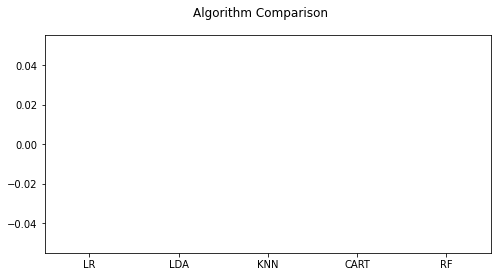

In [22]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

In [23]:
# prepare Random Forest
model_RF = RandomForestClassifier()
model_RF.fit(X_train, Y_train)

RandomForestClassifier()

In [24]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = model_RF.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.72737955346651
[[ 95 210]
 [ 22 524]]
                    precision    recall  f1-score   support

  All_damaged_tiff       0.81      0.31      0.45       305
All_undamaged_tiff       0.71      0.96      0.82       546

          accuracy                           0.73       851
         macro avg       0.76      0.64      0.63       851
      weighted avg       0.75      0.73      0.69       851

